In [1]:
import csv
import uproot
import numpy  as np
import matplotlib.pyplot as plt

###  Load in HEP DATA

In [185]:
import pandas as pd

c_kk_df = pd.read_csv('../HEPData-ins1742786-v1-csv/costheta_{1}^{k}costheta_{2}^{k}.csv', header=8)
c_kk_df

,$\cos\theta_{1}^{k}\cos\theta_{2}^{k}$,$\cos\theta_{1}^{k}\cos\theta_{2}^{k}$ LOW,$\cos\theta_{1}^{k}\cos\theta_{2}^{k}$ HIGH,$\frac{1}{\sigma} \frac{{d}\sigma}{{d}\cos\theta_{1}^{k}\cos\theta_{2}^{k}}$,stat +,stat -,sys +,sys -
0,-0.833333,-1.000000,-0.666667,0.118440,0.006049,-0.006049,0.009209,-0.009209
1,-0.500000,-0.666667,-0.333333,0.419974,0.006276,-0.006276,0.010088,-0.010088
2,-0.166666,-0.333333,0.000000,1.068544,0.011352,-0.011352,0.014251,-0.014251
3,0.166666,0.000000,0.333333,1.014772,0.010861,-0.010861,0.016936,-0.016936
4,0.500000,0.333333,0.666667,0.308504,0.006520,-0.006520,0.010780,-0.010780
5,0.833333,0.666667,1.000000,0.069766,0.005171,-0.005171,0.007474,-0.007474


In [81]:
c_kk_central_value = b1k_df.iloc[:,3]
c_kk_central_value

0    0.118440
1    0.419974
2    1.068544
3    1.014772
4    0.308504
5    0.069766
Name: $\frac{1}{\sigma} \frac{{d}\sigma}{{d}\cos\theta_{1}^{k}\cos\theta_{2}^{k}}$, dtype: float64

### Load in current unfolded file

In [170]:
uproot_fileptr = uproot.open('/scratch/brown/bakshi3/TopSpinCorr_Run2_generalized_ND/CMSSW_10_6_30/src/TopAnalysis/Configuration/analysis/diLeptonic/TUnfoldResults_2016/Nominal/combined/c_kk.root')

In [171]:
[ k for k in uproot_fileptr.keys() if 'TUnfRes' in k]

['c_kkTUnfResult;1',
 'c_kkTUnfResult_rebinnedB;1',
 'c_kkTUnfResult_rebinnedA;1',
 'c_kkTUnfResultCor;1',
 'c_kkTUnfResultCor_rebinnedA;1',
 'c_kkTUnfResultCor_rebinnedB;1']

In [172]:
unfolded_result_corr = uproot_fileptr['c_kkTUnfResultCor_rebinnedA'].to_numpy()[0]
unfolded_result_corr

array([ 33.45195348, 114.720248  , 297.24564617, 275.45176341,
        81.35792476,  17.9991919 ])

In [173]:
# Normalize
unfolded_result_corr = np.divide(unfolded_result_corr, np.sum(unfolded_result_corr))

# And divide by bin width
unfolded_result_corr = unfolded_result_corr/0.33

In [175]:
ratio_central = np.divide(c_kk_central_value, unfolded_result_corr)

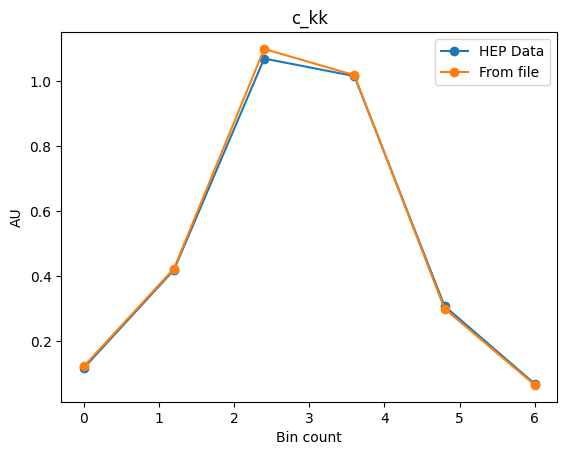

In [196]:
plt.plot(np.linspace(0,6,6), c_kk_central_value  , 'o-', label = 'HEP Data')
plt.plot(np.linspace(0,6,6), unfolded_result_corr, 'o-', label = 'From file')
plt.xlabel('Bin count')
plt.ylabel('AU')
plt.title('c_kk')
plt.legend()

Text(0.5, 1.0, 'Ratio c_kk')

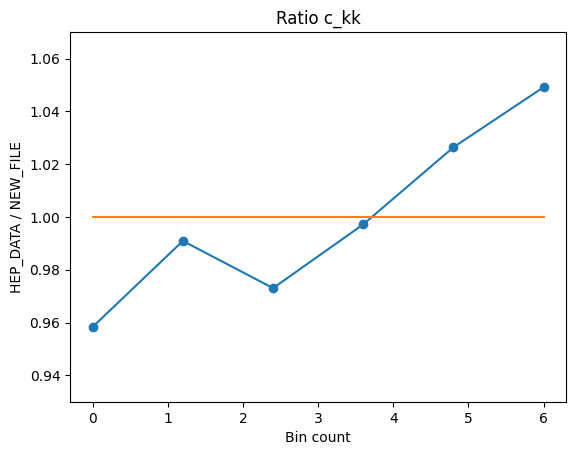

In [168]:
plt.plot(np.linspace(0,6,6), ratio_central, 'o-')
plt.plot(np.linspace(0,6,6), np.ones(6))
plt.ylim(0.93,1.07)
plt.xlabel('Bin count')
plt.ylabel('HEP_DATA / NEW_FILE')
plt.title('Ratio c_kk')

### Comparison of stat unc

In [161]:
stat_from_df = c_kk_df.iloc[:,4]
syst_from_df = c_kk_df.iloc[:,6]

total_from_df = np.sqrt(stat_from_df**2 + syst_from_df**2)
total_from_df

0    0.011018
1    0.011881
2    0.018220
3    0.020119
4    0.012598
5    0.009088
dtype: float64

ColormeshArtists(pcolormesh=<matplotlib.collections.QuadMesh object at 0x7f2643eb8af0>, cbar=<matplotlib.colorbar.Colorbar object at 0x7f2643e7e380>, text=[])

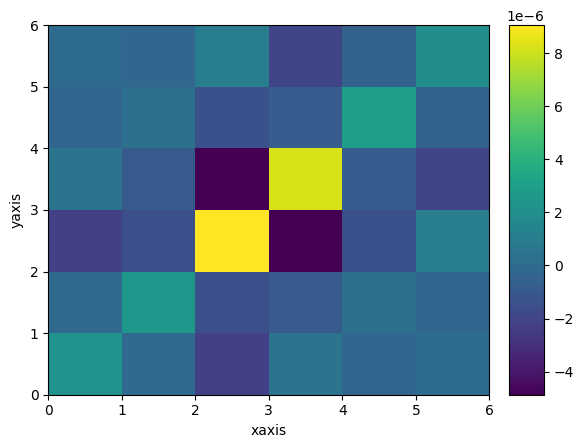

In [162]:
uproot_fileptr['c_kkEmatrixNorm_rebinnedA'].to_hist().plot()

In [193]:
# Diagnol elements of Ematrix scaled by the bin width
statcovmat      = uproot_fileptr['c_kkEmatrixNorm_rebinnedA'].to_numpy()[0]
stat_from_file  = np.array([np.sqrt(statcovmat[i][i]) for i in range(len(statcovmat))])
stat_from_file /= 0.33 

Text(0.5, 1.0, 'Ratio stat uncertainties')

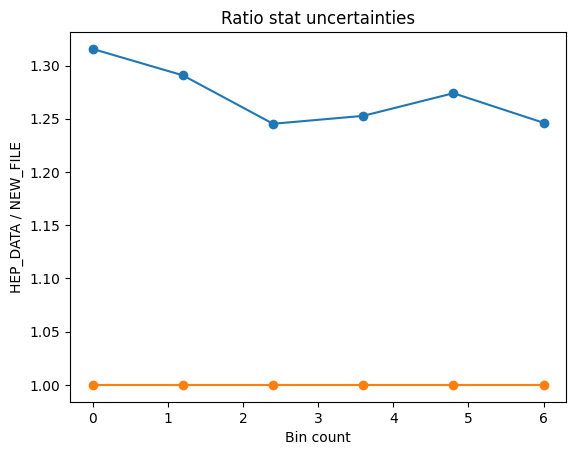

In [195]:
plt.plot(np.linspace(0,6,6), np.divide(stat_from_df, stat_from_file),'o-')
plt.plot(np.linspace(0,6,6), np.ones(6) ,'o-')
plt.xlabel('Bin count')
plt.ylabel('HEP_DATA / NEW_FILE')
plt.title('Ratio stat uncertainties')

### Try with hist variances

In [208]:
total_std   = uproot_fileptr['c_kkTUnfResultCor_rebinnedA'].to_hist().variances()
central_val = uproot_fileptr['c_kkTUnfResultCor_rebinnedA'].to_hist().values()

In [209]:
rel_std = np.divide(np.sqrt(total_std), central_val)
rel_std

array([0.03812399, 0.01227933, 0.00813968, 0.00846939, 0.01748404,
       0.06276285])

Text(0.5, 1.0, 'Ratio uncertainties')

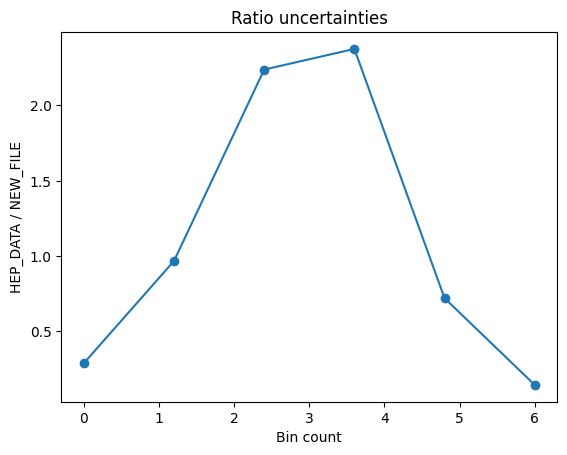

In [210]:
plt.plot(np.linspace(0,6,6), np.divide(total_from_df, rel_std), '-o')
plt.xlabel('Bin count')
plt.ylabel('HEP_DATA / NEW_FILE')
plt.title('Ratio uncertainties')

In [207]:
[k for k in uproot_fileptr.keys() if 'syst' in k]

[]

In [205]:
uproot_fileptr.keys()

['c_kkScanOfRhoAvg1;1',
 'c_kk 0 ScanOfAFBerr1;1',
 'c_kk 0 ScanOfCerr1;1',
 'c_kk 0 ScanOfCerrOpt1;1',
 'c_kk 0 ScanOfa0_1;1',
 'c_kk 0 ScanOfa1_1;1',
 'c_kk 0 ScanOfa2_1;1',
 'c_kk 0 ScanOfCerr0_1;1',
 'c_kk 0 ScanOfCerr1_1;1',
 'c_kk 0 ScanOfCerr2_1;1',
 'c_kk ScanOfRhoAvg2;1',
 'c_kkScanOfRhoAvg1_rebinnedB;1',
 'c_kkScanOfRhoAvg2_rebinnedB;1',
 'c_kkRhoAvg;1',
 'c_kkRhoAvg_rebinnedB;1',
 'c_kkGen_norm;2',
 'c_kkGen_norm;1',
 'c_kkRespMat_norm;2',
 'c_kkRespMat_norm;1',
 'c_kkVisGen_norm;2',
 'c_kkVisGen_norm;1',
 'c_kkReco_norm;3',
 'c_kkReco_norm;2',
 'c_kkReco_norm;1',
 'c_kkRecoBg_UnfoldingHistos_2016preVFP/Nominal/ee/histosTUnfold_ee_wwtoall_2016ULpreVFP.root;1',
 'c_kkRecoBg_UnfoldingHistos_2016preVFP/Nominal/emu/histosTUnfold_emu_wwtoall_2016ULpreVFP.root;1',
 'c_kkRecoBg_UnfoldingHistos_2016preVFP/Nominal/mumu/histosTUnfold_mumu_wwtoall_2016ULpreVFP.root;1',
 'c_kkRecoBg_UnfoldingHistos_2016postVFP/Nominal/ee/histosTUnfold_ee_wwtoall_2016ULpostVFP.root;1',
 'c_kkRecoBg_Unfol